In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from sklearn import linear_model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.layers import LSTM

import numpy as np
import tensorflow as tf

from scipy import integrate
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D

import keras
from keras import optimizers
from keras.models import Model,Sequential,load_model
from keras.layers import Input,Dense,Convolution1D,Activation
from keras.utils import plot_model

from IPython.display import clear_output

Using TensorFlow backend.


In [2]:
data_w_mat = io.loadmat(os.path.join('kuramoto_sivishinky.mat'))

x = data_w_mat['x']
tt = data_w_mat['tt']
uu = data_w_mat['uu'].T
print(x.shape)
print(tt.shape)
print(uu.shape)

(1024, 1)
(1, 251)
(251, 1024)


In [3]:
nn_input = uu[:-1,:]
nn_output = uu[1:,:]
print(nn_input.shape)
print(nn_output.shape)

# nn_input = np.array([[1], [2], [3]])
# nn_output = np.array([[2], [3], [4]])

(250, 1024)
(250, 1024)


In [4]:
N = 1024
T = 251
num_iter = 40
num_tests = 1
KS_input_data = np.zeros(((T-1)*(num_iter-num_tests),N))
KS_target_data = np.zeros(((T-1)*(num_iter-num_tests),N))
print(KS_input_data.shape)
print(KS_target_data.shape)

(9750, 1024)
(9750, 1024)


In [5]:
# def rad_bas(x):
#     return K.exp(-x**2)
# get_custom_objects().update({'rad_bas': Activation(rad_bas)})

# def tan_sig(x):
#     return 2/(1+K.exp(-2*x))-1
# get_custom_objects().update({'tan_sig': Activation(tan_sig)})

In [66]:
model = Sequential()
# model.add(Dense(2*N, activation='tan_sig', use_bias=True, input_shape=(N,)))
# model.add(Dense(2*N, activation='sigmoid', use_bias=True))
# model.add(Dense(2*N, activation='linear', use_bias=True, input_shape = (N,)))
model.add(Dense(2*N, activation='sigmoid',  input_shape = (N,)))
model.add(Dense(2*N, activation='relu'))
model.add(Dense(2*N, activation='linear'))
model.add(Dense(N))

In [54]:
# sgd1 = keras.optimizers.SGD(lr=0.001, decay=1e-15, momentum=1, nesterov=True)
# adam1 = keras.optimizers.Adam(lr=.02)#, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-4, amsgrad=True, clipvalue=0.5)
# nadam1 = keras.optimizers.Nadam(lr=0.02, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
# rmsprop1 = keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)

In [55]:
# model.compile(loss='mean_squared_error', optimizer=sgd1)#, metrics=['accuracy'])

In [72]:
sgd_optimizer = optimizers.SGD(momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='mean_squared_error')
history = model.fit(nn_input, nn_output, epochs=300, validation_split=0.2)

Train on 200 samples, validate on 50 samples
Epoch 1/300
200/200 [==============================] - 2s 9ms/step - loss: 0.1287 - val_loss: 1.1123
Epoch 2/300
200/200 [==============================] - 1s 6ms/step - loss: 0.1264 - val_loss: 1.0973
Epoch 3/300
200/200 [==============================] - 1s 6ms/step - loss: 0.1238 - val_loss: 1.0899
Epoch 4/300
200/200 [==============================] - 1s 6ms/step - loss: 0.1199 - val_loss: 1.0876
Epoch 5/300
200/200 [==============================] - 1s 6ms/step - loss: 0.1171 - val_loss: 1.0794
Epoch 6/300
200/200 [==============================] - 1s 6ms/step - loss: 0.1133 - val_loss: 1.0610
Epoch 7/300
200/200 [==============================] - 1s 6ms/step - loss: 0.1099 - val_loss: 1.0564
Epoch 8/300
200/200 [==============================] - 1s 7ms/step - loss: 0.1063 - val_loss: 1.0528
Epoch 9/300
200/200 [==============================] - 1s 7ms/step - loss: 0.1034 - val_loss: 1.0412
Epoch 10/300
200/200 [========================

Epoch 81/300
200/200 [==============================] - 1s 7ms/step - loss: 0.0307 - val_loss: 0.6542
Epoch 82/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0304 - val_loss: 0.6518
Epoch 83/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0302 - val_loss: 0.6501
Epoch 84/300
200/200 [==============================] - 1s 7ms/step - loss: 0.0299 - val_loss: 0.6526
Epoch 85/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0296 - val_loss: 0.6475
Epoch 86/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0294 - val_loss: 0.6446
Epoch 87/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0291 - val_loss: 0.6453
Epoch 88/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0290 - val_loss: 0.6470
Epoch 89/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0286 - val_loss: 0.6454
Epoch 90/300
200/200 [==============================] - 1s 7ms/step - loss: 0.0284

200/200 [==============================] - 1s 6ms/step - loss: 0.0168 - val_loss: 0.5853
Epoch 161/300
200/200 [==============================] - 1s 5ms/step - loss: 0.0167 - val_loss: 0.5840
Epoch 162/300
200/200 [==============================] - 1s 7ms/step - loss: 0.0166 - val_loss: 0.5841
Epoch 163/300
200/200 [==============================] - 1s 7ms/step - loss: 0.0165 - val_loss: 0.5837
Epoch 164/300
200/200 [==============================] - 1s 7ms/step - loss: 0.0164 - val_loss: 0.5809
Epoch 165/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0164 - val_loss: 0.5801
Epoch 166/300
200/200 [==============================] - 1s 5ms/step - loss: 0.0162 - val_loss: 0.5822
Epoch 167/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0160 - val_loss: 0.5797
Epoch 168/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0160 - val_loss: 0.5790
Epoch 169/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0159 - v

200/200 [==============================] - 1s 7ms/step - loss: 0.0105 - val_loss: 0.5426
Epoch 240/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0105 - val_loss: 0.5429
Epoch 241/300
200/200 [==============================] - 1s 5ms/step - loss: 0.0105 - val_loss: 0.5409
Epoch 242/300
200/200 [==============================] - 1s 5ms/step - loss: 0.0104 - val_loss: 0.5415
Epoch 243/300
200/200 [==============================] - 1s 5ms/step - loss: 0.0104 - val_loss: 0.5402
Epoch 244/300
200/200 [==============================] - 1s 5ms/step - loss: 0.0103 - val_loss: 0.5409
Epoch 245/300
200/200 [==============================] - 1s 5ms/step - loss: 0.0102 - val_loss: 0.5413
Epoch 246/300
200/200 [==============================] - 1s 5ms/step - loss: 0.0102 - val_loss: 0.5393
Epoch 247/300
200/200 [==============================] - 1s 7ms/step - loss: 0.0101 - val_loss: 0.5385
Epoch 248/300
200/200 [==============================] - 1s 6ms/step - loss: 0.0101 - v

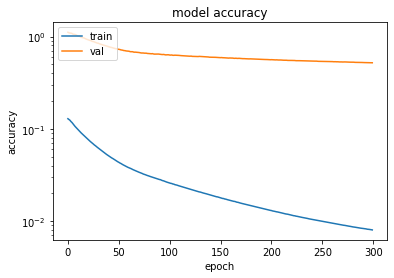

In [73]:
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [56]:
# history = model.fit(nn_input,nn_output,epochs=100, shuffle=True, validation_split=0.2)

Train on 200 samples, validate on 50 samples
Epoch 1/100
200/200 [==============================] - 1s 6ms/step - loss: 1.3557 - val_loss: 2.0158
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 1.2671 - val_loss: 1.9171
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 1.1184 - val_loss: 1.7889
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.9424 - val_loss: 1.6647
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.7709 - val_loss: 1.5762
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6388 - val_loss: 1.5460
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5715 - val_loss: 1.5859
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5761 - val_loss: 1.6928
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6454 - val_loss: 1.8486
Epoch 10/100
200/200 [========================

Epoch 81/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1685 - val_loss: 4.7052
Epoch 82/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1618 - val_loss: 4.8144
Epoch 83/100
200/200 [==============================] - 1s 3ms/step - loss: 0.1561 - val_loss: 4.9269
Epoch 84/100
200/200 [==============================] - 1s 3ms/step - loss: 0.1511 - val_loss: 5.0425
Epoch 85/100
200/200 [==============================] - 1s 3ms/step - loss: 0.1473 - val_loss: 5.1606
Epoch 86/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1446 - val_loss: 5.2809
Epoch 87/100


KeyboardInterrupt: 

In [74]:
print(T)
predicted = np.zeros(uu[0:-1].shape)
predicted[0] = uu[0]
for k in range(len(uu)-2):
    predicted[k+1] = model.predict(np.array([predicted[k]]))

251


In [75]:
print(predicted.shape)
print(predicted)

(250, 1024)
[[1.00611694 1.01219532 1.01823419 ... 0.98765409 0.99384541 1.        ]
 [0.90985298 0.97324288 0.9376412  ... 0.94513351 0.95229119 0.93398923]
 [0.87961471 0.93779296 0.88085294 ... 0.8995409  0.90300566 0.90073884]
 ...
 [1.94999766 1.90601861 1.86142838 ... 1.84365034 1.86481917 1.93220568]
 [1.93404925 1.8932488  1.85545969 ... 1.80346429 1.82706547 1.90811443]
 [1.89835727 1.86370015 1.83102572 ... 1.75311804 1.77786291 1.86881232]]


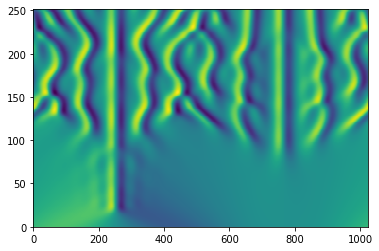

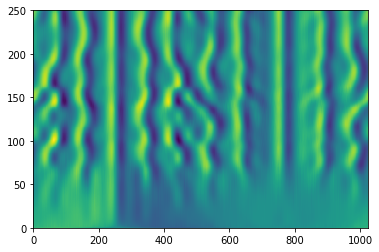

In [76]:
plt.pcolor(uu)
plt.show()
plt.pcolor(predicted)
plt.show()

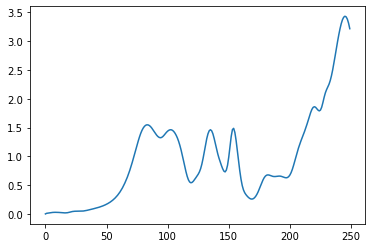

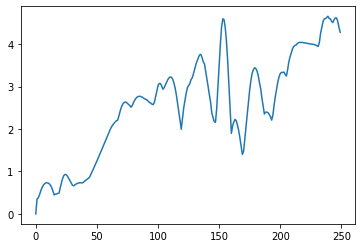

In [84]:
mse = ((uu[:-1] - predicted)**2).mean(axis=1)
# print(mse)
plt.plot(mse)
plt.show()

max_error = (abs(uu[:-1] - predicted)).max(axis=1)
# print(mse)
plt.plot(max_error)
plt.show()

In [16]:
def radbas(x):
    return K.variable(np.exp(-np.power(K.eval(x),2)))

#create model
# model = Sequential()

#add model layers
# model.add(Dense(10, input_dim=1024, activation='sigmoid'))
# # model.add(Dense(10, activation=radbas))
# model.add(Dense(1024, activation='linear'))

trainX = np.reshape(nn_input, (1, 250, 1024))
trainY = np.reshape(nn_output, (1, 250, 1024))
print(trainX.shape)

model = Sequential([
    Dense(100, activation='linear', input_shape=(250, 1024)),
    Dense(100, activation='sigmoid'),
    Dense(100, activation='tanh'),
    Dense(1024, activation = 'linear'),
])
# model.add(LSTM(4, input_shape=(250, 1024)))
# model.add(Dense(250))

# model.summary()

# sgd_optimizer = optimizers.SGD(momentum=0.9)
# model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')
model.compile(optimizer='sgd', loss='mse')
model.fit(x = trainX, y = trainY, epochs=30)

(1, 250, 1024)
Epoch 1/30
1/1 [==============================] - 1s 784ms/step - loss: 1.6527
Epoch 2/30
1/1 [==============================] - 0s 34ms/step - loss: 1.6524
Epoch 3/30
1/1 [==============================] - 0s 48ms/step - loss: 1.6521
Epoch 4/30
1/1 [==============================] - 0s 32ms/step - loss: 1.6518
Epoch 5/30
1/1 [==============================] - 0s 34ms/step - loss: 1.6515
Epoch 6/30
1/1 [==============================] - 0s 39ms/step - loss: 1.6512
Epoch 7/30
1/1 [==============================] - 0s 40ms/step - loss: 1.6508
Epoch 8/30
1/1 [==============================] - 0s 34ms/step - loss: 1.6505
Epoch 9/30
1/1 [==============================] - 0s 32ms/step - loss: 1.6502
Epoch 10/30
1/1 [==============================] - 0s 31ms/step - loss: 1.6499
Epoch 11/30
1/1 [==============================] - 0s 44ms/step - loss: 1.6496
Epoch 12/30
1/1 [==============================] - 0s 43ms/step - loss: 1.6493
Epoch 13/30
1/1 [============================

In [17]:
# data_w_mat = io.loadmat(os.path.join('kuramoto_sivishinky_test.mat'))

# x_test = data_w_mat['x'].T
# tt_test = data_w_mat['tt'].T
# uu_test = data_w_mat['uu'].T

# print(np.array([uu_test[0,:]]).shape)
ynew = model.predict_classes(trainX)#np.array([uu_test[0,:]]))
print(ynew.shape)
# plt.plot(ynew)
# plt.plot(nn_output)

# plt.show()
# ynew = model.predict_classes(Xnew)

(1, 250)


In [61]:
print(ynew)
# print(np.array([uu_test[1,:]]))

[809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809 809
 809 809 809 809 809 809 809 809 809 809 809 809 80